# Confusion Matrix

A confusion matrix shows the predicted values vs. the actual values by counting the true positives, true negatives, false positives, and false negatives.

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

Generate some data

In [46]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=2, cluster_std=3, random_state=42)

print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")

Labels: [0 1 1 1 1 1 1 0 1 0]
Data: [[-2.12128686e-03  5.62516556e+00]
 [ 9.67298128e+00  3.12404959e-01]
 [ 1.35105358e+00 -2.34698296e+00]
 [ 6.20838530e+00  2.52069672e-01]
 [ 4.09843910e+00  1.15524924e+01]
 [ 7.56547173e+00  3.47645219e+00]
 [ 6.39996024e+00  5.48458714e-01]
 [-1.91963411e+00  1.11412974e+01]
 [ 1.72490863e+00 -2.16568481e+00]
 [-2.60857854e+00  1.43979597e+01]]


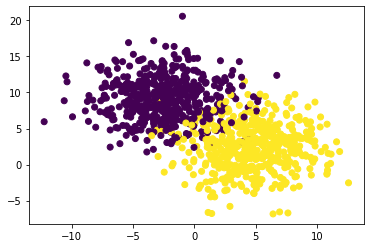

In [47]:
# Visualizing both classes
plt.scatter(X[:, 0], X[:, 1], c=y)

Split our data into training and testing data

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Create a logistic regression model

In [49]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Fit (train) our model by using the training data

In [50]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Validate the model by using the test data

In [51]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9533333333333334
Testing Data Score: 0.956


Create a confusion matrix

In [54]:
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[128,   5],
       [  6, 111]], dtype=int64)

The accuracy of the model on the test data is TP + TN / (TP + FP + TN + FN)

In [57]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) # (111 + 128) / (111 + 5 + 128 + 6)
print(f"Accuracy: {accuracy}")

Accuracy: 0.956
